# Data Mining Assignment 2
## Taskeen Fatima - 03-134211-045

In [2]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
dataset = pd.read_csv('/content/data.csv')

In [4]:
# Display first few rows
print("First few rows of the dataset:")
print(dataset.head())

# Check column names
print("\nColumns in the dataset:")
print(dataset.columns)

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

## Manual Feature Selection

In [5]:
# Select features manually (choosing features that may contribute to the model's accuracy)
X_manual = dataset[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']]
y_manual = dataset['diagnosis']

# Encode the target variable (M = 1, B = 0)
y_manual = y_manual.map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(X_manual, y_manual, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled_manual = scaler.fit_transform(X_train_manual)
X_test_scaled_manual = scaler.transform(X_test_manual)

## Model Training and Testing with Manual Feature Selection

### Decision Tree

In [6]:
# Classifier 1: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled_manual, y_train_manual)
y_pred_dt_manual = dt_model.predict(X_test_scaled_manual)


Decision Tree Classifier with Manual Feature Selection:

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       108
           1       0.81      0.86      0.83        63

    accuracy                           0.87       171
   macro avg       0.86      0.87      0.86       171
weighted avg       0.87      0.87      0.87       171



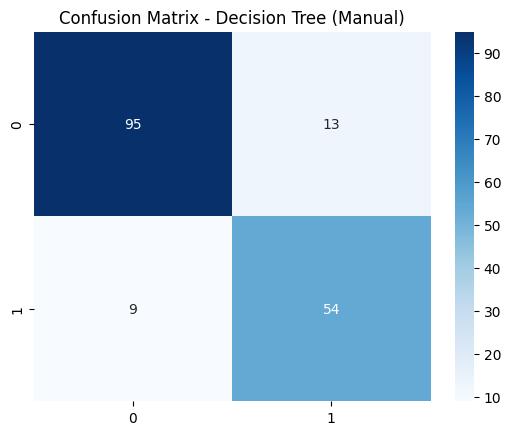

In [7]:
print("\nDecision Tree Classifier with Manual Feature Selection:\n")
print(f"Accuracy: {accuracy_score(y_test_manual, y_pred_dt_manual):.2f}")
print("Classification Report:\n", classification_report(y_test_manual, y_pred_dt_manual))
sns.heatmap(confusion_matrix(y_test_manual, y_pred_dt_manual), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree (Manual)')
plt.show()

### AdaBoost Classifier

In [8]:
# Classifier 2: AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train_scaled_manual, y_train_manual)
y_pred_ada_manual = ada_model.predict(X_test_scaled_manual)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier with Manual Feature Selection:

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



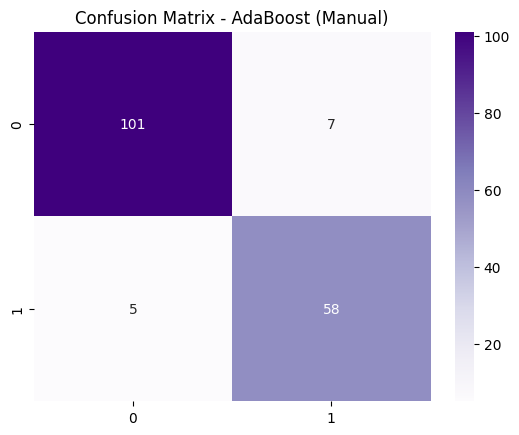

In [9]:
print("\nAdaBoost Classifier with Manual Feature Selection:\n")
print(f"Accuracy: {accuracy_score(y_test_manual, y_pred_ada_manual):.2f}")
print("Classification Report:\n", classification_report(y_test_manual, y_pred_ada_manual))
sns.heatmap(confusion_matrix(y_test_manual, y_pred_ada_manual), annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix - AdaBoost (Manual)')
plt.show()

### Gradient Boosting Classifier

In [10]:
# Classifier 3: Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled_manual, y_train_manual)
y_pred_gb_manual = gb_model.predict(X_test_scaled_manual)


Gradient Boosting Classifier with Manual Feature Selection:

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



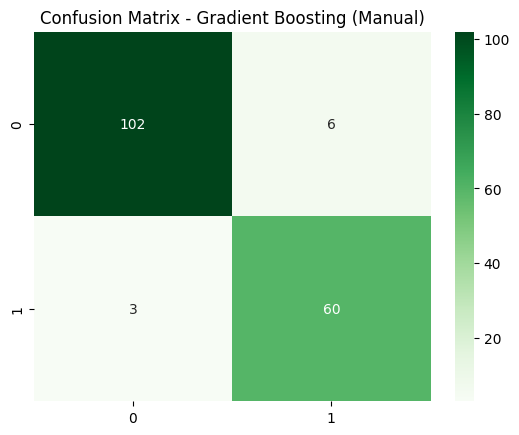

In [11]:
print("\nGradient Boosting Classifier with Manual Feature Selection:\n")
print(f"Accuracy: {accuracy_score(y_test_manual, y_pred_gb_manual):.2f}")
print("Classification Report:\n", classification_report(y_test_manual, y_pred_gb_manual))
sns.heatmap(confusion_matrix(y_test_manual, y_pred_gb_manual), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Gradient Boosting (Manual)')
plt.show()

## Automated Feature Extraction using RFE

In [12]:
# Recursive Feature Elimination (RFE)
print("\nApplying RFE for Automated Feature Extraction:")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=log_reg, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_manual, y_manual)

# Split the data into training and testing sets
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y_manual, test_size=0.3, random_state=42)

# Standardize the data
X_train_scaled_rfe = scaler.fit_transform(X_train_rfe)
X_test_scaled_rfe = scaler.transform(X_test_rfe)


Applying RFE for Automated Feature Extraction:


## Model Training and Testing with RFE

### Decision Tree

In [13]:
# Classifier 1: Decision Tree
dt_model.fit(X_train_scaled_rfe, y_train_rfe)
y_pred_dt_rfe = dt_model.predict(X_test_scaled_rfe)


Decision Tree Classifier with RFE:

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       108
           1       0.81      0.86      0.83        63

    accuracy                           0.87       171
   macro avg       0.86      0.87      0.86       171
weighted avg       0.87      0.87      0.87       171



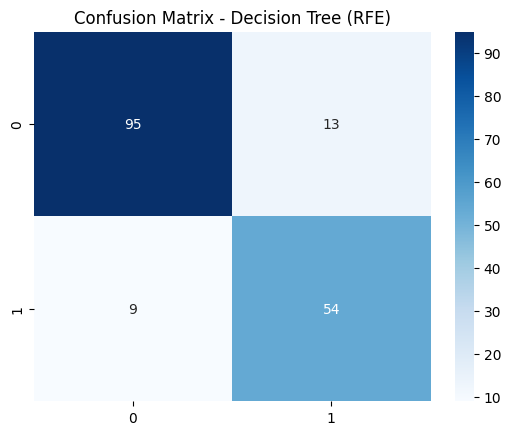

In [14]:
print("\nDecision Tree Classifier with RFE:\n")
print(f"Accuracy: {accuracy_score(y_test_rfe, y_pred_dt_rfe):.2f}")
print("Classification Report:\n", classification_report(y_test_rfe, y_pred_dt_rfe))
sns.heatmap(confusion_matrix(y_test_rfe, y_pred_dt_rfe), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree (RFE)')
plt.show()

### AdaBoost Classifier

In [15]:
# Classifier 2: AdaBoost Classifier
ada_model.fit(X_train_scaled_rfe, y_train_rfe)
y_pred_ada_rfe = ada_model.predict(X_test_scaled_rfe)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier with RFE:

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



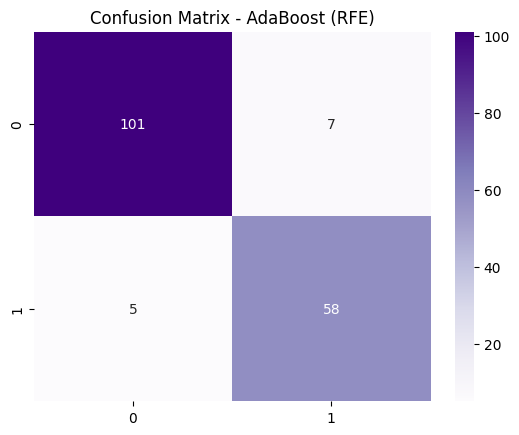

In [16]:
print("\nAdaBoost Classifier with RFE:\n")
print(f"Accuracy: {accuracy_score(y_test_rfe, y_pred_ada_rfe):.2f}")
print("Classification Report:\n", classification_report(y_test_rfe, y_pred_ada_rfe))
sns.heatmap(confusion_matrix(y_test_rfe, y_pred_ada_rfe), annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix - AdaBoost (RFE)')
plt.show()

### Gradient Boosting Classifier

In [17]:
# Classifier 3: Gradient Boosting Classifier
gb_model.fit(X_train_scaled_rfe, y_train_rfe)
y_pred_gb_rfe = gb_model.predict(X_test_scaled_rfe)


Gradient Boosting Classifier with RFE:

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



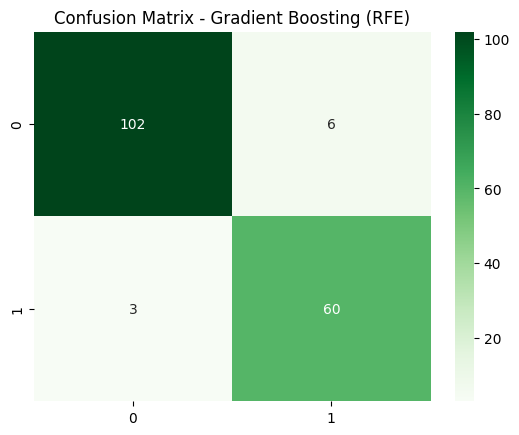

In [18]:
print("\nGradient Boosting Classifier with RFE:\n")
print(f"Accuracy: {accuracy_score(y_test_rfe, y_pred_gb_rfe):.2f}")
print("Classification Report:\n", classification_report(y_test_rfe, y_pred_gb_rfe))
sns.heatmap(confusion_matrix(y_test_rfe, y_pred_gb_rfe), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Gradient Boosting (RFE)')
plt.show()

## Automated Feature Extraction using SelectKBest

In [19]:
# Automated Feature Extraction using SelectKBest
print("\nApplying SelectKBest for Automated Feature Extraction:")
select_k_best = SelectKBest(score_func=f_classif, k=5)
X_k_best = select_k_best.fit_transform(X_manual, y_manual)

# Split the data into training and testing sets
X_train_k_best, X_test_k_best, y_train_k_best, y_test_k_best = train_test_split(X_k_best, y_manual, test_size=0.3, random_state=42)

# Standardize the data
X_train_scaled_k_best = scaler.fit_transform(X_train_k_best)
X_test_scaled_k_best = scaler.transform(X_test_k_best)


Applying SelectKBest for Automated Feature Extraction:


## Model Training and Testing with SelectKBest

Decision Tree

In [20]:
# Classifier 1: Decision Tree
dt_model.fit(X_train_scaled_k_best, y_train_k_best)
y_pred_dt_k_best = dt_model.predict(X_test_scaled_k_best)


Decision Tree Classifier with SelectKBest:

Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       108
           1       0.81      0.86      0.83        63

    accuracy                           0.87       171
   macro avg       0.86      0.87      0.86       171
weighted avg       0.87      0.87      0.87       171



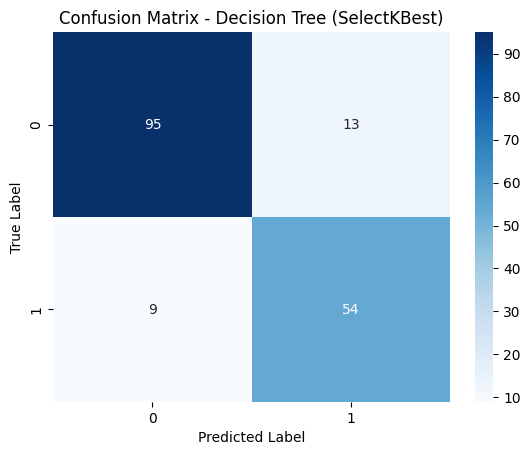

In [21]:
print("\nDecision Tree Classifier with SelectKBest:\n")
print(f"Accuracy: {accuracy_score(y_test_k_best, y_pred_dt_k_best):.2f}")
print("Classification Report:\n", classification_report(y_test_k_best, y_pred_dt_k_best))
sns.heatmap(confusion_matrix(y_test_k_best, y_pred_dt_k_best), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Decision Tree (SelectKBest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### AdaBoost Classifier

In [22]:
ada_model.fit(X_train_scaled_k_best, y_train_k_best)
y_pred_ada_k_best = ada_model.predict(X_test_scaled_k_best)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier with SelectKBest:

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       108
           1       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



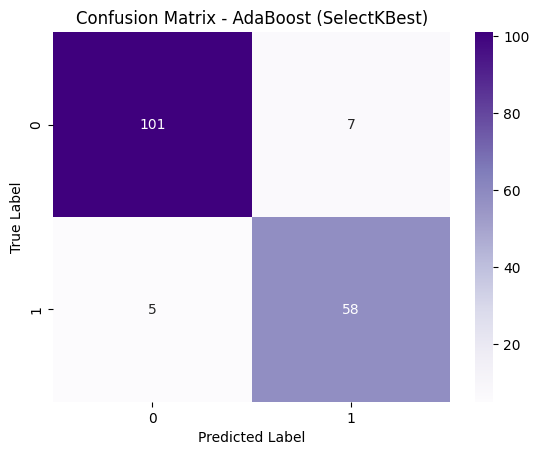

In [23]:
print("\nAdaBoost Classifier with SelectKBest:\n")
print(f"Accuracy: {accuracy_score(y_test_k_best, y_pred_ada_k_best):.2f}")
print("Classification Report:\n", classification_report(y_test_k_best, y_pred_ada_k_best))
sns.heatmap(confusion_matrix(y_test_k_best, y_pred_ada_k_best), annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix - AdaBoost (SelectKBest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gradient Boosting Classifier

In [24]:
gb_model.fit(X_train_scaled_k_best, y_train_k_best)
y_pred_gb_k_best = gb_model.predict(X_test_scaled_k_best)


Gradient Boosting Classifier with SelectKBest:

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



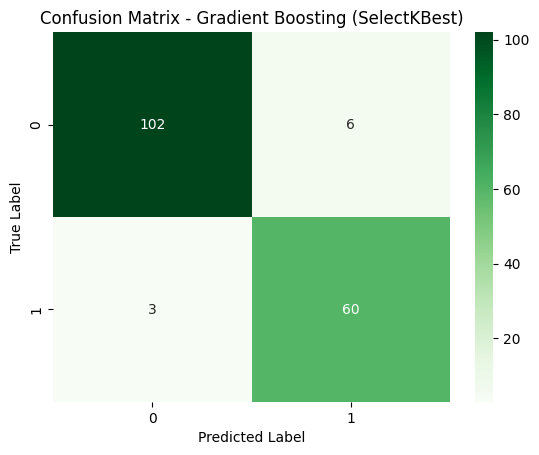

In [25]:
print("\nGradient Boosting Classifier with SelectKBest:\n")
print(f"Accuracy: {accuracy_score(y_test_k_best, y_pred_gb_k_best):.2f}")
print("Classification Report:\n", classification_report(y_test_k_best, y_pred_gb_k_best))
sns.heatmap(confusion_matrix(y_test_k_best, y_pred_gb_k_best), annot=True, cmap='Greens', fmt='d')
plt.title('Confusion Matrix - Gradient Boosting (SelectKBest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary

### Decision Tree Classifier Summary:
The Decision Tree classifier achieved a consistent accuracy of 87% across all feature selection techniques, including Manual Selection, Recursive Feature Elimination (RFE), and SelectKBest. The model showed balanced performance, with precision, recall, and F1-scores that slightly favored the majority class (label 0). Although the Decision Tree did not reach the higher accuracy levels of the boosting classifiers, it provided a good baseline for comparison. The weighted average F1-score of 0.87 indicates that the Decision Tree maintained a respectable performance in distinguishing between the two classes, making it a viable option for simpler classification tasks.

### AdaBoost Classifier Summary:
The AdaBoost classifier outperformed the Decision Tree, consistently achieving an accuracy of 93% with all feature selection methods. The model demonstrated high precision, recall, and F1-scores across both classes, with a weighted average F1-score of 0.93. AdaBoost's strong performance indicates its ability to improve the base classifiers' results through iterative boosting, resulting in a more accurate and robust model. The results were consistent regardless of the feature selection technique, showcasing AdaBoost's resilience and effectiveness in handling various feature sets and providing reliable predictions.

### Gradient Boosting Classifier Summary:
The Gradient Boosting classifier delivered the highest performance among the models tested, with an impressive accuracy of 95% across Manual Selection, RFE, and SelectKBest. This classifier demonstrated exceptional precision, recall, and F1-scores for both classes, achieving a weighted average F1-score of 0.95. The consistency of these results across different feature selection methods highlights the Gradient Boosting Classifier's powerful ability to handle complex patterns in the data and deliver accurate predictions. Its effectiveness in both precision and recall shows it is particularly suited for applications where identifying true positives is critical, making it the top choice among the models evaluated.

## Conclusion:

The Gradient Boosting Classifier emerged as the most accurate model, achieving 95% accuracy across all feature selection methods. AdaBoost also performed strongly with a consistent 93% accuracy. The Decision Tree classifier, while effective, did not achieve the same level of performance as the boosting algorithms but maintained a respectable accuracy of 87%. Automated feature extraction methods (RFE and SelectKBest) were comparable to manual selection, indicating their reliability and efficiency in selecting relevant features without extensive manual input.